In [1]:
## Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.simplefilter('ignore')

In [2]:
## Reading the dataset
df=pd.read_csv('bank-full.csv')
df.sample(10)
#df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
37361,39,technician,married,secondary,no,4741,yes,no,cellular,13,may,166,1,338,10,failure,no
35354,38,blue-collar,married,primary,no,1,yes,no,cellular,7,may,154,1,-1,0,unknown,no
27820,33,management,married,tertiary,no,332,yes,yes,cellular,28,jan,706,1,-1,0,unknown,no
32457,35,management,married,tertiary,no,1906,yes,no,cellular,16,apr,102,1,148,5,other,no
34391,59,retired,divorced,secondary,no,514,no,no,cellular,4,may,673,6,90,1,success,yes
13062,42,management,divorced,secondary,no,-272,no,no,cellular,8,jul,186,1,-1,0,unknown,no
5992,31,blue-collar,married,secondary,no,27,yes,yes,unknown,26,may,109,5,-1,0,unknown,no
42613,35,management,married,tertiary,no,323,no,no,cellular,11,jan,261,2,-1,0,unknown,yes
35218,26,unknown,divorced,secondary,no,-295,yes,no,cellular,7,may,556,1,-1,0,unknown,no
35989,55,blue-collar,married,secondary,no,1569,yes,no,cellular,8,may,156,4,-1,0,unknown,no


In [3]:
### Dataset Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
### Shape of Dataset
df.shape

(45211, 17)

In [5]:
### Checking for any missing and null values
print(df.isna().sum())
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [6]:
### 5 point summary details
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


In [7]:
### Checking whether dataset is balanced or not
df.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

### Checking for Outliers

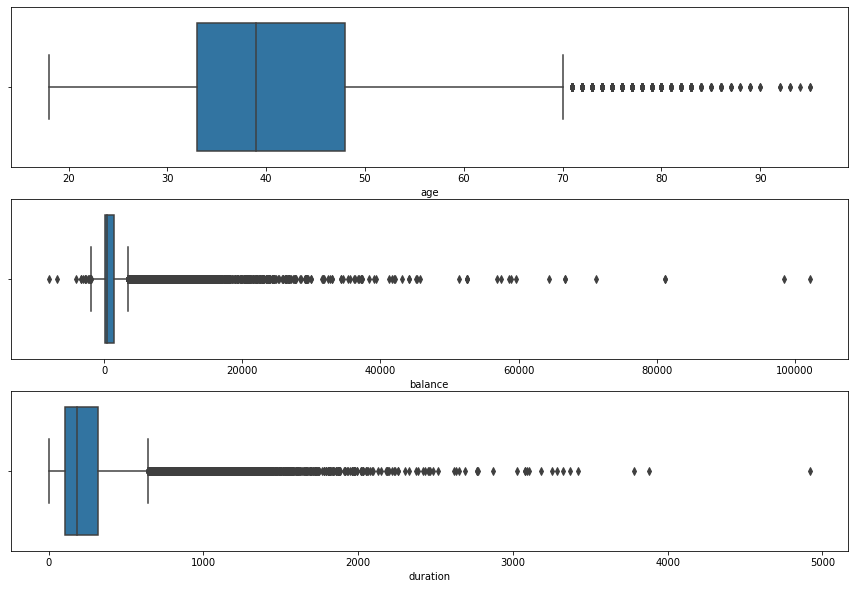

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
sns.boxplot(df['age'])
plt.subplot(3,1,2)
sns.boxplot(df['balance'])
plt.subplot(3,1,3)
sns.boxplot(df['duration'])

In [9]:
print(df.age.median())
print(df.balance.median())
print(df.balance.max())
print(df.duration.max())
print(df.duration.median())

39.0
448.0
102127
4918
180.0


### Treating Outlier in Age

In [10]:
IQRvalue=df["age"].quantile(0.75)+1.5*(df["age"].quantile(0.75) - df["age"].quantile(0.25))
for i in df['age']:
    if(i > IQRvalue):
        df['age']=df['age'].replace(i,IQRvalue)


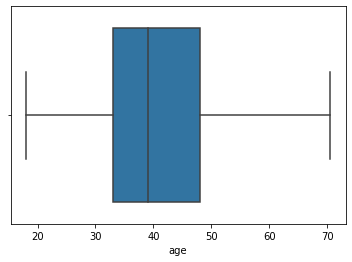

In [11]:
sns.boxplot(df['age'])

### Treating Outlier in Balance 

In [12]:
IQRvalue=df["balance"].quantile(0.75)+1.5*(df["balance"].quantile(0.75) - df["balance"].quantile(0.25))
for i in df['balance']:
    if(i > IQRvalue):
        df['balance']=df['balance'].replace(i,IQRvalue)

In [13]:
## Taking Backup 1
df_bkp=df.copy(deep=True)

In [14]:
IQRvalue=df["balance"].quantile(0.25)-1.5*(df["balance"].quantile(0.75) - df["balance"].quantile(0.25))
for i in df['balance']:
    if(i < IQRvalue):
        df['balance']=df['balance'].replace(i,IQRvalue)

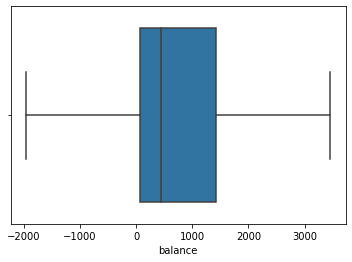

In [15]:
sns.boxplot(df['balance'])

### Treating Outlier in Duration

In [16]:
df.duration.median()
df.duration.max()

4918

In [17]:
IQRvalue=df["duration"].quantile(0.75)+1.5*(df["duration"].quantile(0.75) - df["duration"].quantile(0.25))
for i in df['duration']:
    if(i > IQRvalue):
        df['duration']=df['duration'].replace(i,IQRvalue)

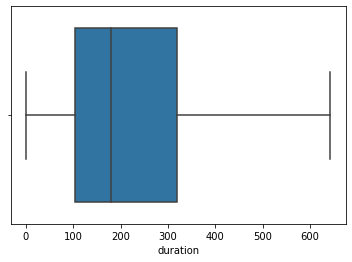

In [18]:
sns.boxplot(df['duration'])

### Treating Outlier in Campaign

In [19]:
print(df.campaign.median())
print(df.campaign.max())
print(df.campaign.min())
print(df.campaign.mean())


2.0
63
1
2.763840658246887


In [20]:
IQRvalue=df["campaign"].quantile(0.75)+1.5*(df["campaign"].quantile(0.75) - df["campaign"].quantile(0.25))
for i in df['campaign']:
    if(i > IQRvalue):
        df['campaign']=df['campaign'].replace(i,IQRvalue)

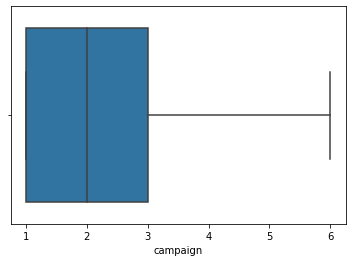

In [21]:
sns.boxplot(df['campaign'])

### Removing negative days in Pdays column

In [22]:
## Checking for negative values in Pdays column
print(df.pdays.median())
print(df.pdays.max())
print(df.pdays.min())
print(df.pdays.mean())

-1.0
871
-1
40.19782796222158


In [23]:
### Replacing negative values with zero(0)
for i in df['pdays']:
    if i<0:
        df['pdays']=df['pdays'].replace(i,0)

In [24]:
## No negative values found 
print(df.pdays.min())

0


In [25]:
### Removing One Extreme outlier from previous column for better performance
i=df[df['previous']==df['previous'].max()].index
df.drop(i,inplace=True)
df[df['previous']==df['previous'].max()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
38326,46.0,blue-collar,married,primary,no,1085,yes,yes,cellular,15,may,523,2,353,58,other,yes


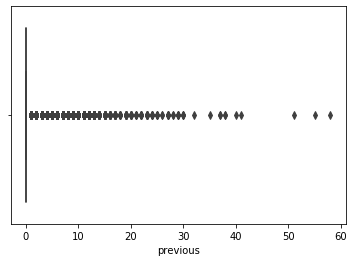

In [26]:
sns.boxplot(df['previous'])

### Performing EDA

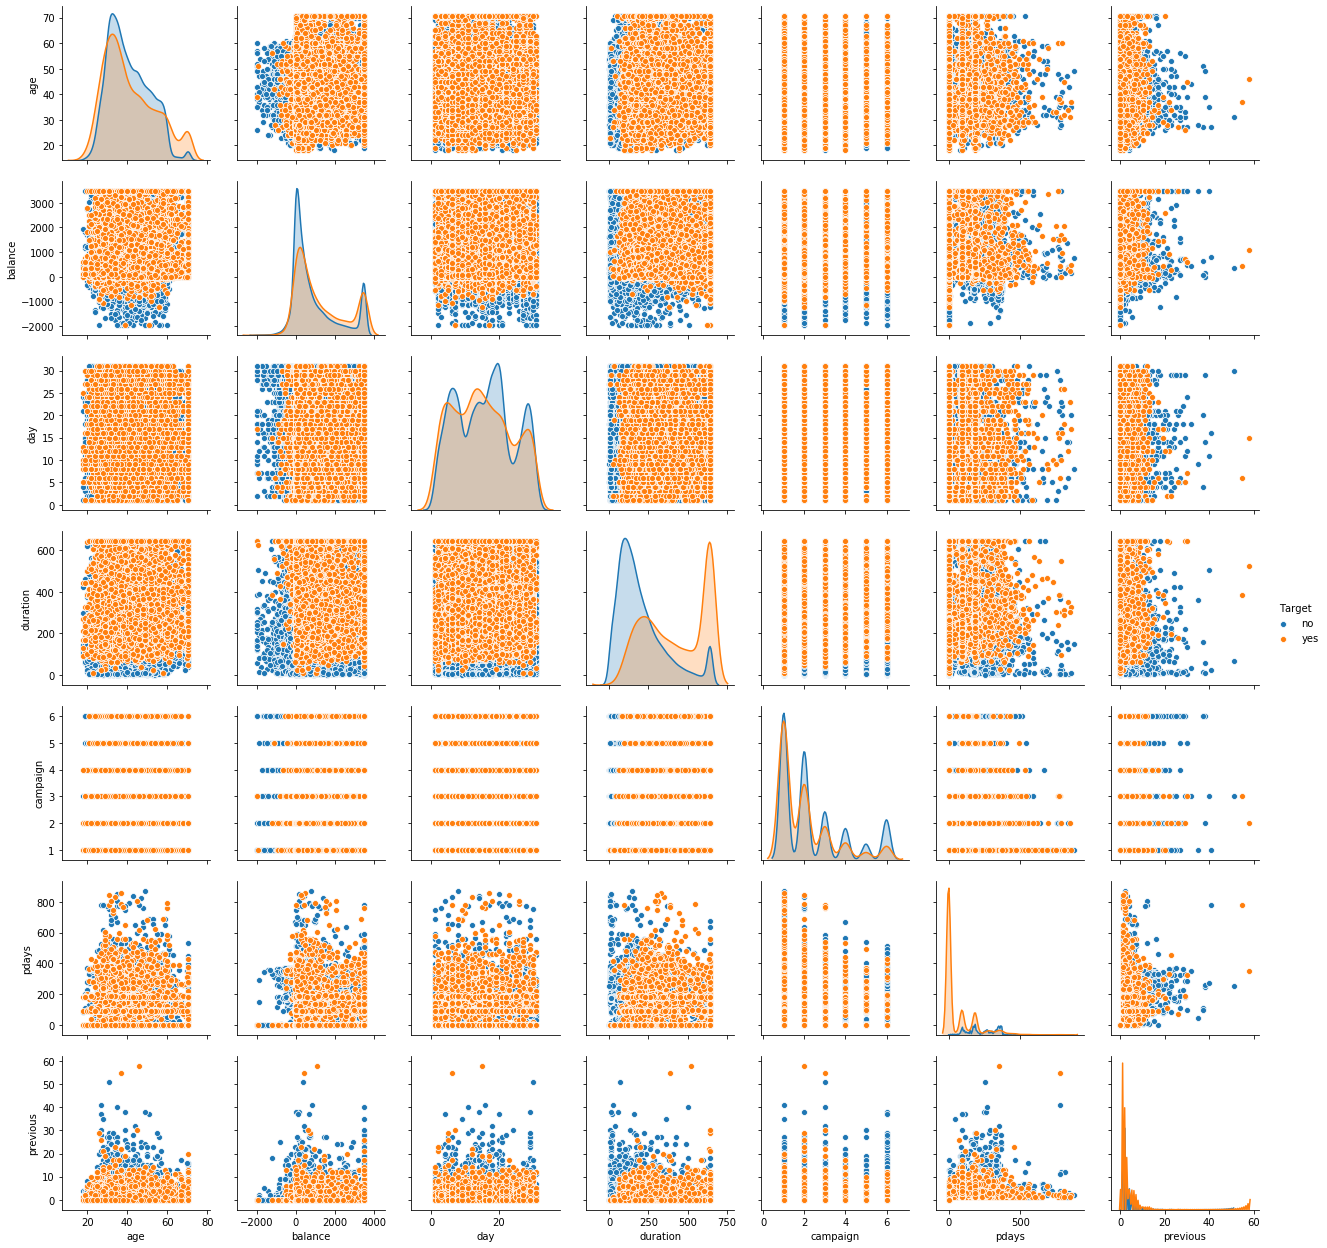

In [27]:
### Pairplot on continous variable
sns.pairplot(df,hue='Target')

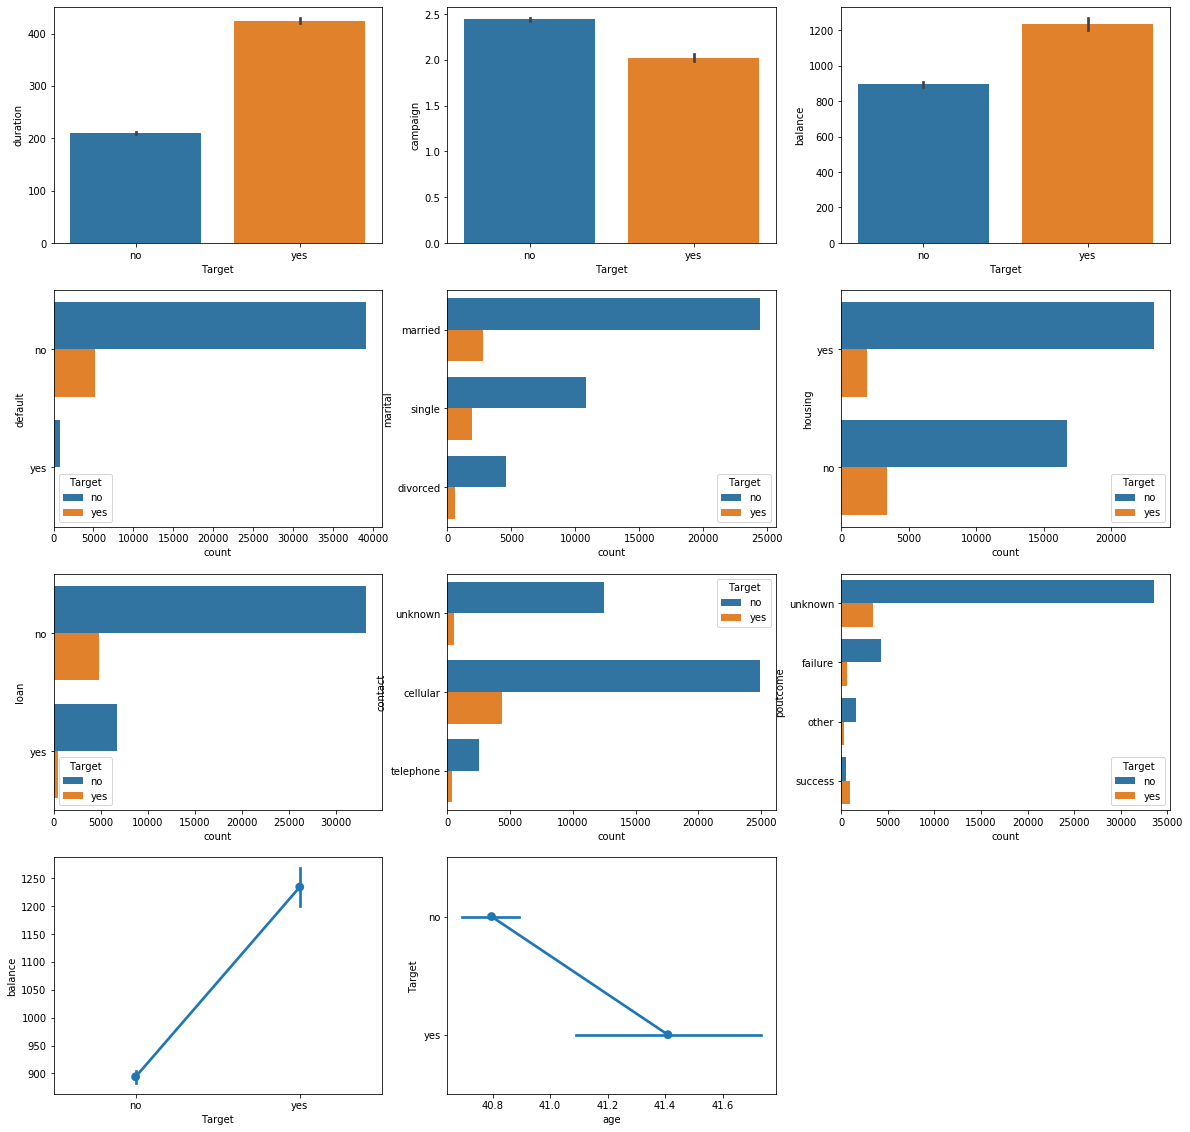

In [28]:
## Target
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y='duration',x='Target',data=df)
plt.subplot(4,3,2)
sns.barplot(y='campaign',x='Target',data=df)
plt.subplot(4,3,3)
sns.barplot(y='balance',x='Target',data=df)
plt.subplot(4,3,4)
sns.countplot(y='default',data=df,hue='Target')
plt.subplot(4,3,5)
sns.countplot(y='marital',hue='Target',data=df)
plt.subplot(4,3,6)
sns.countplot(y='housing',hue='Target',data=df)
plt.subplot(4,3,7)
sns.countplot(y='loan',hue='Target',data=df)
plt.subplot(4,3,8)
sns.countplot(y='contact',hue='Target',data=df)
plt.subplot(4,3,9)
sns.countplot(y='poutcome',hue='Target',data=df)
plt.subplot(4,3,10)
sns.pointplot(y='balance',x='Target',data=df)
plt.subplot(4,3,11)
sns.pointplot(x='age',y='Target',data=df)

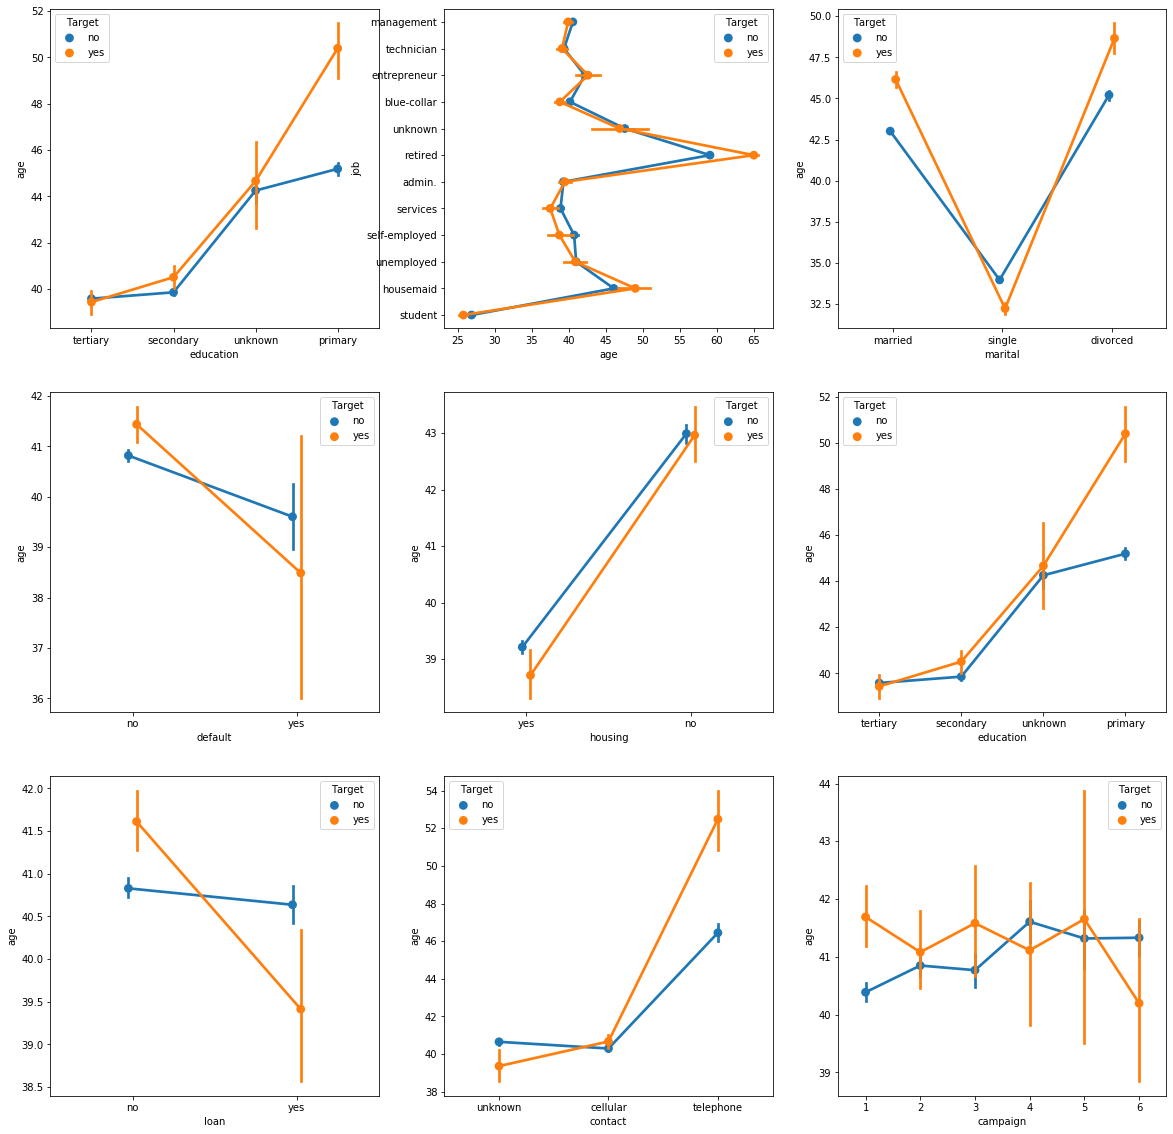

In [29]:
##age
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.pointplot(y='age',x='education',data=df,hue='Target')
plt.subplot(3,3,2)
sns.pointplot(x='age',y='job',data=df,hue='Target')
plt.subplot(3,3,3)
sns.pointplot(y='age',x='marital',data=df,hue='Target',dodge=True)
plt.subplot(3,3,4)
sns.pointplot(y='age',x='default',data=df,hue='Target',dodge=True)
plt.subplot(3,3,5)
sns.pointplot(y='age',x='housing',data=df,hue='Target',dodge=True)
plt.subplot(3,3,6)
sns.pointplot(y='age',x='education',data=df,hue='Target')
plt.subplot(3,3,7)
sns.pointplot(y='age',x='loan',data=df,hue='Target',dodge=True)
plt.subplot(3,3,8)
sns.pointplot(y='age',x='contact',data=df,hue='Target')
plt.subplot(3,3,9)
sns.pointplot(y='age',x='campaign',data=df,hue='Target')

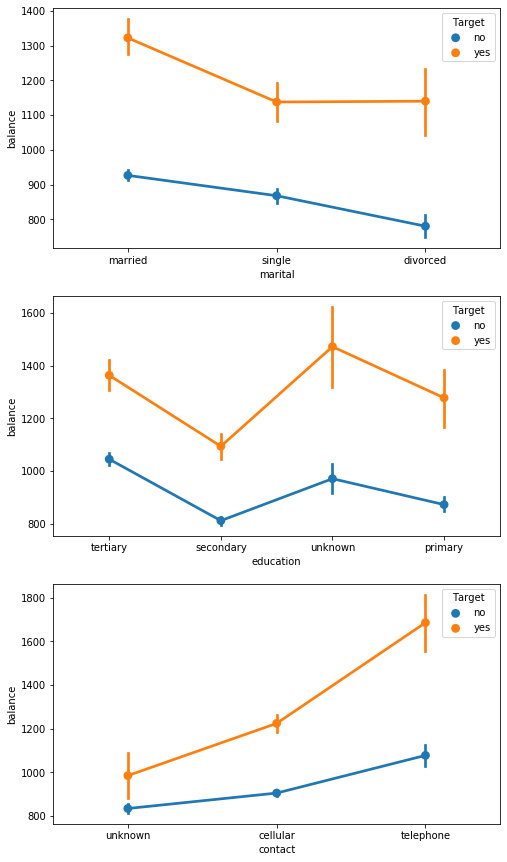

In [30]:
## balance
plt.figure(figsize=(8,15))
plt.subplot(3,1,1)
sns.pointplot(y='balance',x='marital',data=df,hue='Target')
plt.subplot(3,1,2)
sns.pointplot(y='balance',x='education',data=df,hue='Target')
plt.subplot(3,1,3)
sns.pointplot(y='balance',x='contact',data=df,hue='Target')

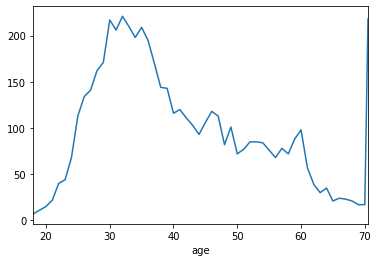

In [31]:
### To find the average range of AGE for people subscribing the campaign
a=df[df['Target']=='yes']
a=a.groupby('age')
a['Target'].count().plot()

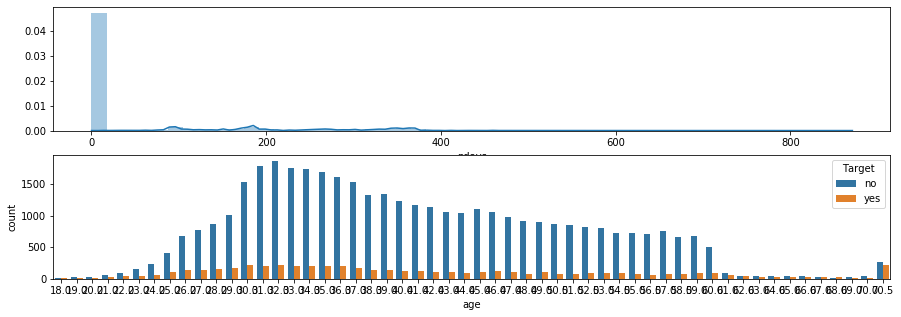

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(2,1,1)
sns.distplot(df['pdays'],norm_hist=True)
plt.subplot(2,1,2)
sns.countplot(x='age',data=df,hue='Target')

### Exploratory Data Analysis Report

- Thus from BarPlot and Correlatin Graph, It is clear that DURATION  has good correlation and dependence on TARGET 
- From Barplot we could see that people who have NO HOUSING LOAN has likely tend to have subscribed MORE than other.
- With help of Barplot, We could see that most of the people who subscribed the campaign has been contacted through CELLULAR
- Using Distplot and by Grouping count we could see MOST of people subscribed for the campaign is AGE between 27 and 40 
- From Pairplot and distplot we could see that ,No of days that passed by after the client was last contacted from a previous campaign was mostly between 100 to 200 pdays and 330 to 370 days

### preparing data to train model

In [33]:
## Taking backup 2
df_bkp2=df.copy(deep=True)

In [34]:
### datatypes before performing onehot encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
age          45210 non-null float64
job          45210 non-null object
marital      45210 non-null object
education    45210 non-null object
default      45210 non-null object
balance      45210 non-null int64
housing      45210 non-null object
loan         45210 non-null object
contact      45210 non-null object
day          45210 non-null int64
month        45210 non-null object
duration     45210 non-null int64
campaign     45210 non-null int64
pdays        45210 non-null int64
previous     45210 non-null int64
poutcome     45210 non-null object
Target       45210 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 7.5+ MB


In [35]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,0,unknown,no


In [36]:
### Performing onehot encoding
a={'marital':{'single':0,'married':1,'divorced':2},
   'education':{'unknown':0,'primary':1,'secondary':2,'tertiary':3},
   'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
   }
df.replace(a,inplace=True)

In [37]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58.0,management,1,3,no,2143,yes,no,unknown,5,5,261,1,0,0,unknown,no
1,44.0,technician,0,2,no,29,yes,no,unknown,5,5,151,1,0,0,unknown,no
2,33.0,entrepreneur,1,2,no,2,yes,yes,unknown,5,5,76,1,0,0,unknown,no
3,47.0,blue-collar,1,0,no,1506,yes,no,unknown,5,5,92,1,0,0,unknown,no
4,33.0,unknown,0,0,no,1,no,no,unknown,5,5,198,1,0,0,unknown,no


In [38]:
### datatypes after performing onehot encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
age          45210 non-null float64
job          45210 non-null object
marital      45210 non-null int64
education    45210 non-null int64
default      45210 non-null object
balance      45210 non-null int64
housing      45210 non-null object
loan         45210 non-null object
contact      45210 non-null object
day          45210 non-null int64
month        45210 non-null int64
duration     45210 non-null int64
campaign     45210 non-null int64
pdays        45210 non-null int64
previous     45210 non-null int64
poutcome     45210 non-null object
Target       45210 non-null object
dtypes: float64(1), int64(9), object(7)
memory usage: 7.5+ MB


In [39]:
### Label enconding the other object columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        le.fit(df[i])
        df[i]=le.transform(df[i])
        print(le.classes_[0])
        

admin.
no
no
no
cellular
failure
no


In [40]:
### converting the age (float) to age (int)
df['age']=df['age'].astype('int32')

In [41]:
### Checking whether all attributes are integer dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 17 columns):
age          45210 non-null int32
job          45210 non-null int64
marital      45210 non-null int64
education    45210 non-null int64
default      45210 non-null int64
balance      45210 non-null int64
housing      45210 non-null int64
loan         45210 non-null int64
contact      45210 non-null int64
day          45210 non-null int64
month        45210 non-null int64
duration     45210 non-null int64
campaign     45210 non-null int64
pdays        45210 non-null int64
previous     45210 non-null int64
poutcome     45210 non-null int64
Target       45210 non-null int64
dtypes: int32(1), int64(16)
memory usage: 7.3 MB


#### checking the correlation of all attributes with the target variable

In [42]:
df.corr().T

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.023673,0.407658,-0.171463,-0.017349,0.121378,-0.182102,-0.012956,0.027590,-0.008823,0.093651,-0.014503,0.025943,-0.025527,-0.000472,0.009201,0.018469
job,-0.023673,1.000000,-0.062045,0.135903,-0.006853,0.023912,-0.125362,-0.033005,-0.082065,0.022852,0.043140,0.002273,0.009461,-0.024528,-0.000769,0.011007,0.040437
marital,0.407658,-0.062045,1.000000,-0.095424,0.007024,-0.007752,0.016091,0.046895,0.039206,0.005272,0.050950,-0.014833,0.022780,-0.019155,-0.018955,0.016861,-0.045585
education,-0.171463,0.135903,-0.095424,1.000000,-0.009032,0.045921,-0.038714,0.004319,-0.151465,0.021707,0.067984,-0.000959,0.004229,0.006916,0.026701,-0.027187,0.051351
default,-0.017349,-0.006853,0.007024,-0.009032,1.000000,-0.123658,-0.006023,0.077233,0.015402,0.009419,0.014984,-0.006708,0.015826,-0.029922,-0.021698,0.034894,-0.022420
balance,0.121378,0.023912,-0.007752,0.045921,-0.123658,1.000000,-0.080835,-0.119745,-0.037034,0.009959,0.107527,0.041947,-0.026533,0.016997,0.043685,-0.046285,0.092921
housing,-0.182102,-0.125362,0.016091,-0.038714,-0.006023,-0.080835,1.000000,0.041332,0.188140,-0.027950,-0.173860,0.004843,-0.038685,0.124314,0.041919,-0.099943,-0.139167
loan,-0.012956,-0.033005,0.046895,0.004319,0.077233,-0.119745,0.041332,1.000000,-0.010880,0.011354,0.021622,-0.015415,0.003227,-0.022689,-0.011943,0.015443,-0.068189
contact,0.027590,-0.082065,0.039206,-0.151465,0.015402,-0.037034,0.188140,-0.010880,1.000000,-0.027963,-0.173813,-0.030364,0.004239,-0.244506,-0.176187,0.272198,-0.148402
day,-0.008823,0.022852,0.005272,0.021707,0.009419,0.009959,-0.027950,0.011354,-0.027963,1.000000,0.101933,-0.039262,0.152971,-0.092950,-0.057155,0.083407,-0.028362


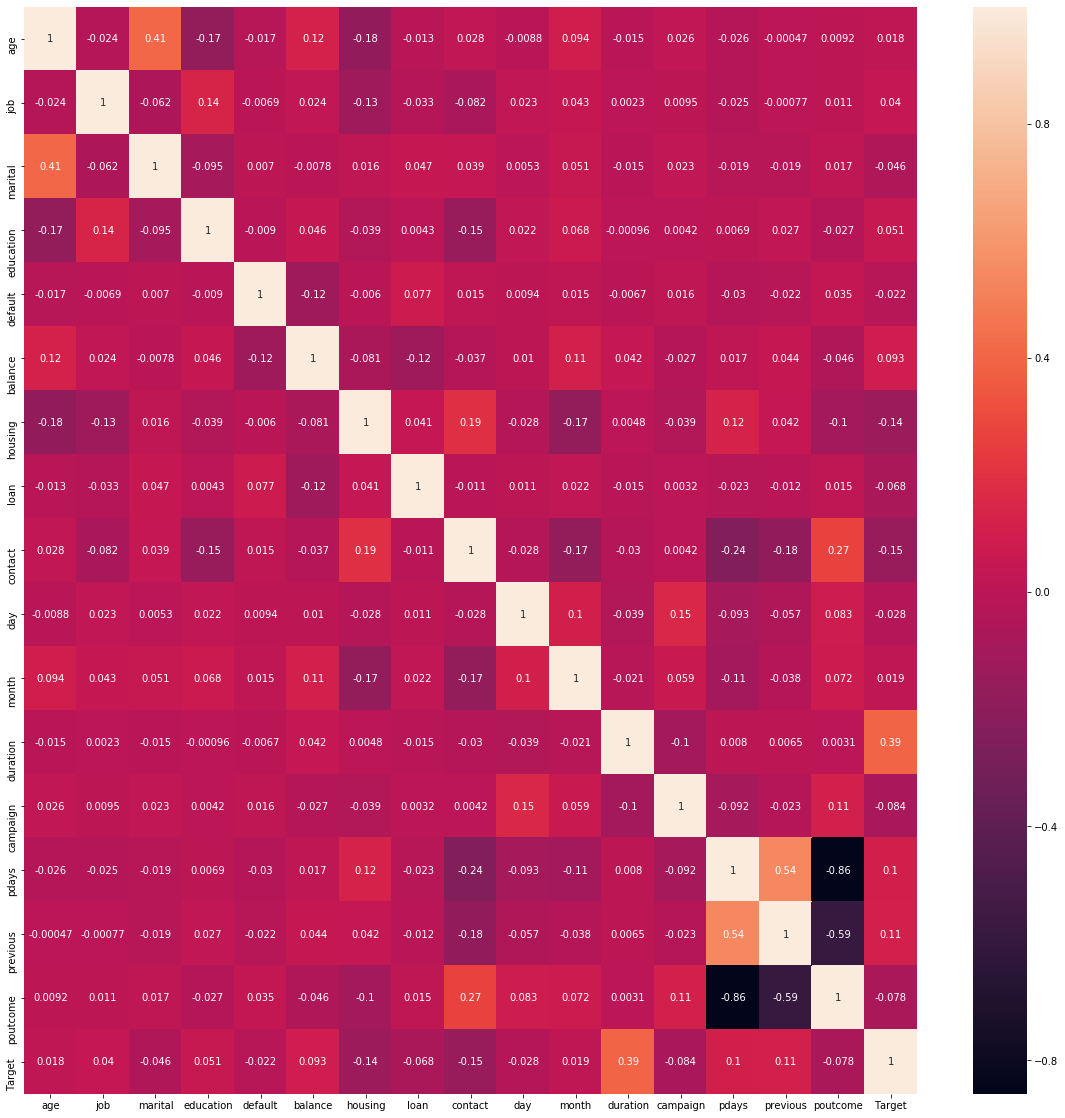

In [43]:
## Presenting the correlation graph using heatmap
corr=df.corr().T
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

### Splitting the data into train and test

In [44]:
print(df.shape)
X=df.drop('Target',axis=1)
y=df.Target
print(X.shape)
print(y.shape)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=3)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(45210, 17)
(45210, 16)
(45210,)
(31647, 16) (31647,)
(13563, 16) (13563,)


### Implementing using Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
y_pred_lr=lr.predict(x_test)
y_pred_prob_lr=lr.predict_proba(x_test)

0.8879830631655449
0.888667698886677


In [46]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12011
           1       0.53      0.25      0.34      1552

    accuracy                           0.89     13563
   macro avg       0.72      0.61      0.64     13563
weighted avg       0.87      0.89      0.87     13563



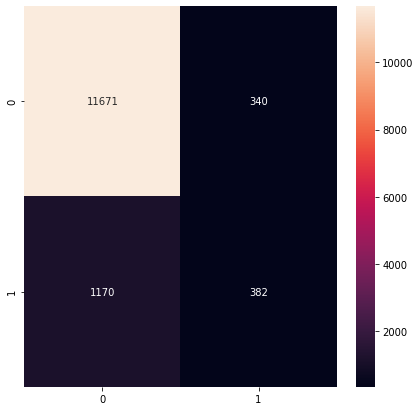

In [47]:

cm=confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='1')

### Using KNN classification algorithm

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,n_jobs=3)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))
y_pred_knn=knn.predict(x_test)
y_pred_prob_knn=knn.predict_proba(x_test)

0.9088065219452081
0.8796726387967264


In [49]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     12011
           1       0.46      0.27      0.34      1552

    accuracy                           0.88     13563
   macro avg       0.68      0.62      0.64     13563
weighted avg       0.86      0.88      0.87     13563



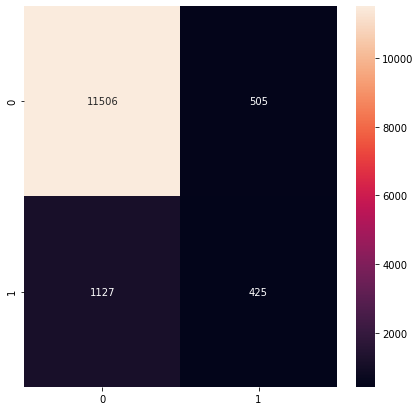

In [50]:
cm=confusion_matrix(y_test,y_pred_knn)
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='1')

### Using Naive Bayes Theorem 

In [51]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print(nb.score(x_train,y_train))
print(nb.score(x_test,y_test))
y_pred_nb=nb.predict(x_test)
y_pred_prob_nb=nb.predict_proba(x_test)

0.842386324138149
0.8441347784413478


In [52]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     12011
           1       0.36      0.47      0.41      1552

    accuracy                           0.84     13563
   macro avg       0.64      0.68      0.66     13563
weighted avg       0.86      0.84      0.85     13563



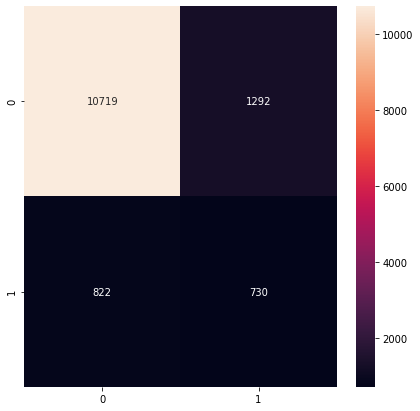

In [53]:
cm=confusion_matrix(y_test,y_pred_nb)
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='1')

### KNN after scaling its improved

In [54]:
from scipy.stats import zscore
X_scaled=zscore(X)
x_train1,x_test1,y_train1,y_test1=train_test_split(X_scaled,y,test_size=.3,random_state=3)

In [55]:
knn1=KNeighborsClassifier(n_neighbors=5,n_jobs=3)
knn1.fit(x_train1,y_train)
print(knn1.score(x_train1,y_train))
print(knn1.score(x_test1,y_test))
y_pred_knn1=knn1.predict(x_test1)
y_pred_prob_knn1=knn1.predict_proba(x_test)

0.9188232691882326
0.8933864189338642


### Using Decision Tree classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train,y_train)
print(dtree.score(x_train,y_train))
print(dtree.score(x_test,y_test))
y_pred_dtree=dtree.predict(x_test)

1.0
0.8792302587923025


In [57]:
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     12011
           1       0.47      0.50      0.49      1552

    accuracy                           0.88     13563
   macro avg       0.70      0.71      0.71     13563
weighted avg       0.88      0.88      0.88     13563



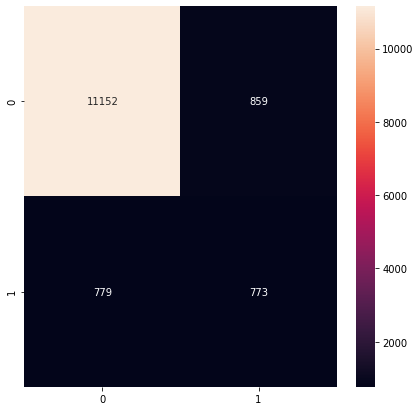

In [58]:
cm=confusion_matrix(y_test,y_pred_dtree)
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='1')

### Pruning with DecisonTree Classifier

In [59]:
dtreeR=DecisionTreeClassifier(criterion='entropy',max_depth=8,class_weight={0:1,1:1},random_state=3)
dtreeR.fit(x_train,y_train)
print(dtreeR.score(x_train,y_train))
print(dtreeR.score(x_test,y_test))
y_pred_dtreeR=dtreeR.predict(x_test)
y_pred_prob_dtreeR=dtreeR.predict_proba(x_test)

0.9082693462255506
0.9052569490525695


In [60]:
print(classification_report(y_test,y_pred_dtreeR))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12011
           1       0.62      0.43      0.51      1552

    accuracy                           0.91     13563
   macro avg       0.78      0.70      0.73     13563
weighted avg       0.89      0.91      0.90     13563



### Using Bagging Classifier

In [61]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(base_estimator=dtreeR,n_estimators=50,random_state=3)
bgcl.fit(x_train,y_train)
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))
y_pred_bgcl=bgcl.predict(x_test)
y_pred_prob_bgcl=bgcl.predict_proba(x_test)

0.9165481720226246
0.9062891690628917


In [62]:
print(classification_report(y_test,y_pred_bgcl))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12011
           1       0.64      0.41      0.50      1552

    accuracy                           0.91     13563
   macro avg       0.78      0.69      0.73     13563
weighted avg       0.89      0.91      0.90     13563



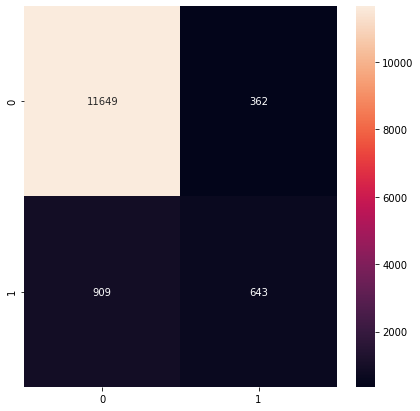

In [63]:
cm=confusion_matrix(y_test,y_pred_bgcl)
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='1')

### Using Boosting Methods

In [64]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(n_estimators=100,random_state=3)
abcl.fit(x_train,y_train)
print(abcl.score(x_train,y_train))
print(abcl.score(x_test,y_test))
y_pred_abcl=abcl.predict(x_test)
y_pred_prob_abcl=abcl.predict_proba(x_test)

0.8968622618257654
0.9008331490083314


In [65]:
print(classification_report(y_test,y_pred_abcl))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12011
           1       0.61      0.36      0.45      1552

    accuracy                           0.90     13563
   macro avg       0.77      0.66      0.70     13563
weighted avg       0.89      0.90      0.89     13563



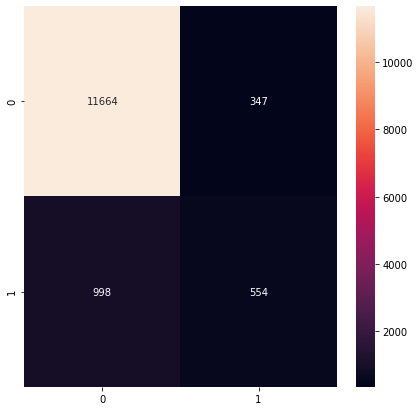

In [66]:
cm=confusion_matrix(y_test,y_pred_abcl)
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='1')

### Using Gradient Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(random_state=3)
gbcl.fit(x_train,y_train)
print(gbcl.score(x_train,y_train))
print(gbcl.score(x_test,y_test))
y_pred_gbcl=gbcl.predict(x_test)
y_pred_prob_gbcl=gbcl.predict_proba(x_test)

0.9054886719120295
0.9059942490599425


In [68]:
print(classification_report(y_test,y_pred_gbcl))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12011
           1       0.65      0.39      0.49      1552

    accuracy                           0.91     13563
   macro avg       0.79      0.68      0.72     13563
weighted avg       0.89      0.91      0.90     13563



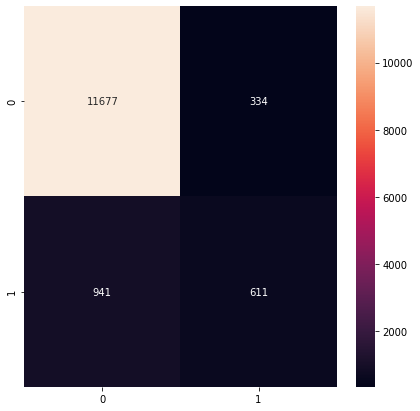

In [69]:
cm=confusion_matrix(y_test,y_pred_gbcl)
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='1')

### Using Random Forest classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=3)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))
y_pred_rf=rf.predict(x_test)
y_pred_prob_rf=rf.predict_proba(x_test)

0.9998104085695326
0.9054781390547814


In [71]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12011
           1       0.63      0.41      0.50      1552

    accuracy                           0.91     13563
   macro avg       0.78      0.69      0.72     13563
weighted avg       0.89      0.91      0.90     13563



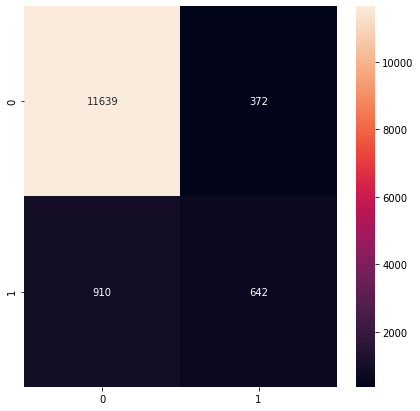

In [72]:
cm=confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(7,7))
sns.heatmap(cm,annot=True,fmt='1')

### ROC Curve Implementation

In [73]:
import pylab as pl
from sklearn.metrics import roc_curve,auc

### For Logistic Regression 

fpr1,tpr1,thrs1=roc_curve(y_test,y_pred_prob_lr[:,1])
auc_lr=auc(fpr1,tpr1)
print("Area Under Curve for Logistic Regression is :",auc_lr)

Area Under Curve for Logistic Regression is : 0.8758272592906674


In [74]:
### For KNN Classification

fpr2,tpr2,thrs2=roc_curve(y_test,y_pred_prob_knn1[:,1])
auc_knn1=auc(fpr2,tpr2)
print("Area Under Curve for KNN Classification is :",auc_knn1)

Area Under Curve for KNN Classification is : 0.4440900984664401


In [75]:
### For Naive Bayes Classification

fpr3,tpr3,thrs3=roc_curve(y_test,y_pred_prob_nb[:,1])
auc_nb=auc(fpr3,tpr3)
print("Area Under Curve for Naive Bayes Classification is :",auc_nb)

Area Under Curve for Naive Bayes Classification is : 0.8298822084910139


In [76]:
### For Decision Tree Classification

fpr4,tpr4,thrs4=roc_curve(y_test,y_pred_prob_dtreeR[:,1])
auc_dtreeR=auc(fpr4,tpr4)

print("Area Under Curve for Naive Bayes Classification is :",auc_dtreeR)

Area Under Curve for Naive Bayes Classification is : 0.8832765089904702


In [77]:
### For Bagging Classifier

fpr5,tpr5,thrs5=roc_curve(y_test,y_pred_prob_bgcl[:,1])
auc_bgcl=auc(fpr5,tpr5)

print("Area Under Curve for Bagging Classification is :",auc_bgcl)

Area Under Curve for Bagging Classification is : 0.9249398317864982


In [78]:
### For AdaBoosting Classifier

fpr6,tpr6,thrs6=roc_curve(y_test,y_pred_prob_abcl[:,1])
auc_abcl=auc(fpr6,tpr6)

print("Area Under Curve for AdaBoosting Classification is :",auc_abcl)

Area Under Curve for AdaBoosting Classification is : 0.916701786249203


In [79]:
### For GradientBoosting Classifier

fpr7,tpr7,thrs7=roc_curve(y_test,y_pred_prob_gbcl[:,1])
auc_gbcl=auc(fpr7,tpr7)

print("Area Under Curve for GradientBoosting Classification is :",auc_gbcl)

Area Under Curve for GradientBoosting Classification is : 0.9282141338223466


In [80]:
### For Random Forest Classifier

fpr8,tpr8,thrs8=roc_curve(y_test,y_pred_prob_rf[:,1])
auc_rf=auc(fpr8,tpr8)

print("Area Under Curve for Random Forest_classifier Classification is :",auc_rf)

Area Under Curve for Random Forest_classifier Classification is : 0.9245150171621032


### Plotting the ROC Curver

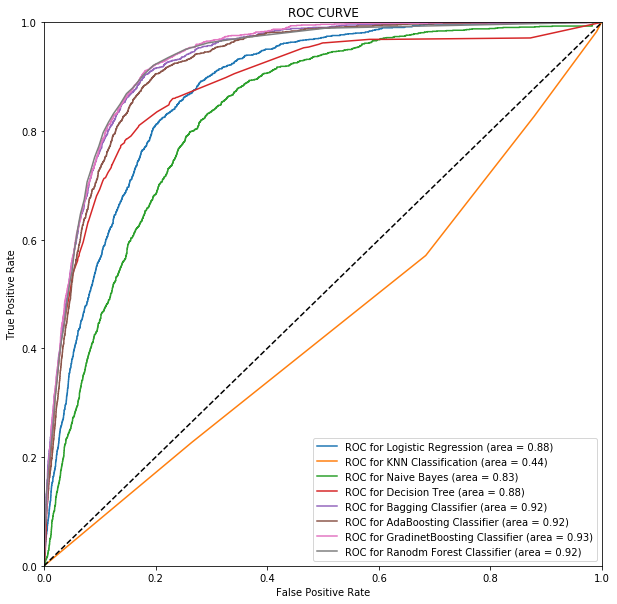

In [81]:
pl.figure(figsize=(10,10))
pl.clf()
pl.plot(fpr1,tpr1,label='ROC for Logistic Regression (area = %.2f)'% auc_lr)
pl.plot(fpr2,tpr2,label='ROC for KNN Classification (area = %.2f)'% auc_knn1)
pl.plot(fpr3,tpr3,label='ROC for Naive Bayes (area = %.2f)'% auc_nb)
pl.plot(fpr4,tpr4,label='ROC for Decision Tree (area = %.2f)'% auc_dtreeR)
pl.plot(fpr5,tpr5,label='ROC for Bagging Classifier (area = %.2f)'% auc_bgcl)
pl.plot(fpr6,tpr6,label='ROC for AdaBoosting Classifier (area = %.2f)'% auc_abcl)
pl.plot(fpr7,tpr7,label='ROC for GradinetBoosting Classifier (area = %.2f)'% auc_gbcl)
pl.plot(fpr8,tpr8,label='ROC for Ranodm Forest Classifier (area = %.2f)'% auc_rf)
pl.plot([0,1],[0,1],'k--')
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC CURVE')
pl.legend(loc='0')
pl.show()


### Performance of each model indivudually

In [82]:
print(" Logistic Regression             : ",np.round(lr.score(x_test,y_test),2)*100,"%")
print(" KNN classifcation               : ",np.round(knn.score(x_test,y_test),2)*100,"%")
print(" KNN classifcation after scaling : ",np.round(knn1.score(x_test1,y_test1),2)*100,"%")
print(" Naive Bayes Theorem             : ",np.round(nb.score(x_test,y_test),2)*100,"%")
print(" Decision Tree classifier        : ",np.round(dtree.score(x_test,y_test),2)*100,"%")
print(" Decision Tree classifier Pruned : ",np.round(dtreeR.score(x_test,y_test),2)*100,"%")
print(" Bagging classifier              : ",np.round(bgcl.score(x_test,y_test),2)*100,"%")
print(" Adaboosting classifier          : ",np.round(abcl.score(x_test,y_test),2)*100,"%")
print(" Gradient Boosting classifier    : ",np.round(gbcl.score(x_test,y_test),2)*100,"%")

 Logistic Regression             :  89.0 %
 KNN classifcation               :  88.0 %
 KNN classifcation after scaling :  89.0 %
 Naive Bayes Theorem             :  84.0 %
 Decision Tree classifier        :  88.0 %
 Decision Tree classifier Pruned :  91.0 %
 Bagging classifier              :  91.0 %
 Adaboosting classifier          :  90.0 %
 Gradient Boosting classifier    :  91.0 %


### CONCLUSION

### Thus from various models , With the TEST PERFORMANCE and ROC curve score , It is shown that Gradient Boosting Algorithm has done well for this particular dataset

